## Curso de Big Data

## Trabajo Práctico 3 - Parte 2

### Grupo:  Armas Braithwaite, Fernández, Menta, Vargas Ochuza

In [1]:
import pandas as pd
import numpy as np
#from ISLP import load_data

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

## Ejercicio 1

In [2]:
# Cargar el conjunto de datos de cáncer de mama
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


In [3]:
def evalua_metodo(modelo, X_train, y_train, X_test, y_test):
    '''
    Evalua un modelo de clasificación proporcionando métricas clave y visualizando la curva ROC.
    
    Input:
    - modelo: modelo de clasificación ya instanciado (debe tener los métodos `fit`, `predict` y `predict_proba`).
    - X_train, y_train: datos de entrenamiento.
    - X_test, y_test: datos de prueba.
    
    Output:
    - Diccionario con las siguientes métricas:
        * matriz_confusion: Matriz de confusión del modelo.
        * valor_auc: Área bajo la curva ROC.
        * accuracy: Precisión del modelo.
    - Gráfico de la curva ROC.
    '''
    # Entrenando el modelo
    modelo.fit(X_train, y_train)
    
    # Predicciones
    y_pred = modelo.predict(X_test)
    y_pred_prob = modelo.predict_proba(X_test)[:, 1]
    
    # Calculando métricas
    matriz_confusion = confusion_matrix(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    valor_auc = auc(fpr, tpr)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Dibujando la curva ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='Curva ROC (área = %0.2f)' % valor_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('Tasa de falsos positivos')
    plt.ylabel('Tasa de verdaderos positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()
    
    # Retornando métricas
    return {
        'matriz_confusion': matriz_confusion,
        'valor_auc': valor_auc,
        'accuracy': accuracy
    }


C:\Users\mateo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


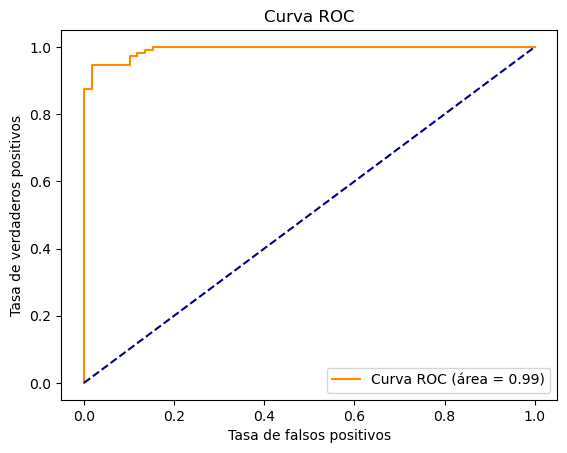

{'matriz_confusion': array([[ 56,   3],
       [  6, 106]], dtype=int64), 'valor_auc': 0.9924334140435835, 'accuracy': 0.9473684210526315}


In [4]:
# Definir el modelo
modelo = LogisticRegression()

# Usar la función evalua_metodo
resultados = evalua_metodo(modelo, X_train, y_train, X_test, y_test)
print(resultados)

In [ ]:
# Definir el modelo
knn = KNeighborsClassifier(n_neighbors=5)
modelo2=knn.fit(X_train, y_train)
#Usar la función evalua_metodo
resultados = evalua_metodo(modelo2, X_train, y_train, X_test, y_test)
print(resultados)

In [ ]:
# Definir el modelo
modelo3= LinearDiscriminantAnalysis(n_components=1)
#Usar la función evalua_metodo
resultados = evalua_metodo(modelo3, X_train, y_train, X_test, y_test)
print(resultados)

## Ejercicio 2

In [9]:
from sklearn.model_selection import KFold

def cross_validation(modelo, k, X, y):
    """
    Realiza validación cruzada k-fold y evalúa un modelo de regresión polinómica en cada partición.
    
    Input:
    - modelo: modelo de regresión.
    - k: número de particiones para CV.
    - X: variables independientes.
    - y: variable dependiente (target).
    
    Output:
    - Un DataFrame con la partición y el error cuadrático medio (ECM) 
      para cada iteración de la validación cruzada.
    """
    kf = KFold(n_splits=k, shuffle=True, random_state=100)
    resultados = pd.DataFrame(columns=["particion", "ecm"])

    for i, (train_index, test_index) in enumerate(kf.split(X)):   
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            
            ecm = modelo(X_train, X_test, y_train, y_test)[1]
                
            resultados = resultados.append({
                "particion": i,
                "ecm": ecm
            }, ignore_index=True)
    
    return resultados.astype({"particion":int})


In [10]:
K = 5
resultados_cv = cross_validation(modelo, K, X, y)
print(resultados_cv)

TypeError: 'LogisticRegression' object is not callable

## Ejercicio 3

In [ ]:
def evalua_config(configuraciones, X, y):
    """
    Evalúa diferentes configuraciones de hiperparámetros para un modelo y devuelve la mejor configuración.
    
    Parámetros:
    - configuraciones (list): Lista de diccionarios con las diferentes configuraciones de hiperparámetros.
    - X: variables independientes del conjunto de datos.
    - y: variable dependiente (target) del conjunto de datos.
    
    Devoluciones:
    - Diccionario con la mejor configuración y su correspondiente precisión promedio.
    """
    
    mejor_configuracion = None
    mejor_accuracy = 0
    
    for config in configuraciones:
        modelo = LogisticRegression(max_iter=10000, **config)
        resultados = cross_validation(modelo, 5, X, y)
        accuracy_promedio = resultados['accuracy'].mean()
        
        if accuracy_promedio > mejor_accuracy:
            mejor_accuracy = accuracy_promedio
            mejor_configuracion = config
    
    return {
        'mejor_configuracion': mejor_configuracion,
        'mejor_accuracy': mejor_accuracy
    }





In [ ]:
configuraciones = [
    {'penalty': 'l2', 'C': 1.0},
    {'penalty': 'l1', 'C': 1.0, 'solver': 'saga'},
    {'penalty': 'l2', 'C': 0.5},
    ]

resultado = evalua_config(configuraciones, X, y)
print(resultado)


## Ejercicio 4

In [ ]:
def evalua_multiples_metodos(X, y):
    modelos = {
        "Regresion Logistica": LogisticRegression(max_iter=10000),
        "LDA": LinearDiscriminantAnalysis(),
        "KNN": KNeighborsClassifier(n_neighbors=5) # Puedes ajustar n_neighbors
    }

    # Optimización de hiperparámetros para Regresión Logística
    configuraciones_rl = [
        {'penalty': 'l2', 'C': 1.0},
        {'penalty': 'l1', 'C': 1.0, 'solver': 'saga'},
        {'penalty': 'l2', 'C': 0.5},
        ]
    mejor_config = evalua_config(configuraciones_rl, X, y)['mejor_configuracion']
    modelos["Regresion Logistica"].set_params(**mejor_config)

    # Almacenar resultados
    resultados = []

    for nombre, modelo in modelos.items():
        metricas = cross_validation(modelo, 5, X, y)
        accuracy_promedio = metricas['accuracy'].mean()
        valor_auc_promedio = metricas['valor_auc'].mean()

        resultados.append({
            "Modelo": nombre + " " + str(modelo.get_params()),
            "accuracy_promedio": accuracy_promedio,
            "valor_auc_promedio": valor_auc_promedio
        })

    return pd.DataFrame(resultados)

# Ejemplo de uso:
resultados_modelos = evalua_multiples_metodos(X, y)
print(resultados_modelos)
